# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; a. focus on age bands

In [123]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

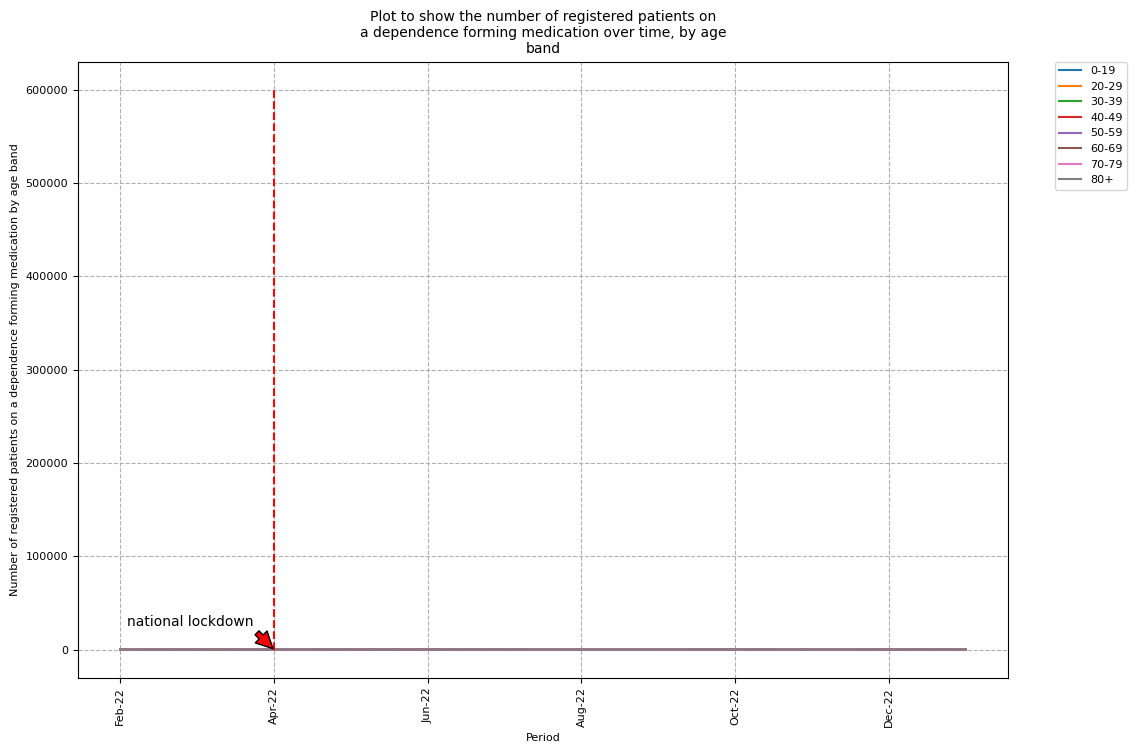

In [124]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=600000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [125]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     244      265      241      261      249      248      243    243
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23     254      227      245      252      256      261      241    249


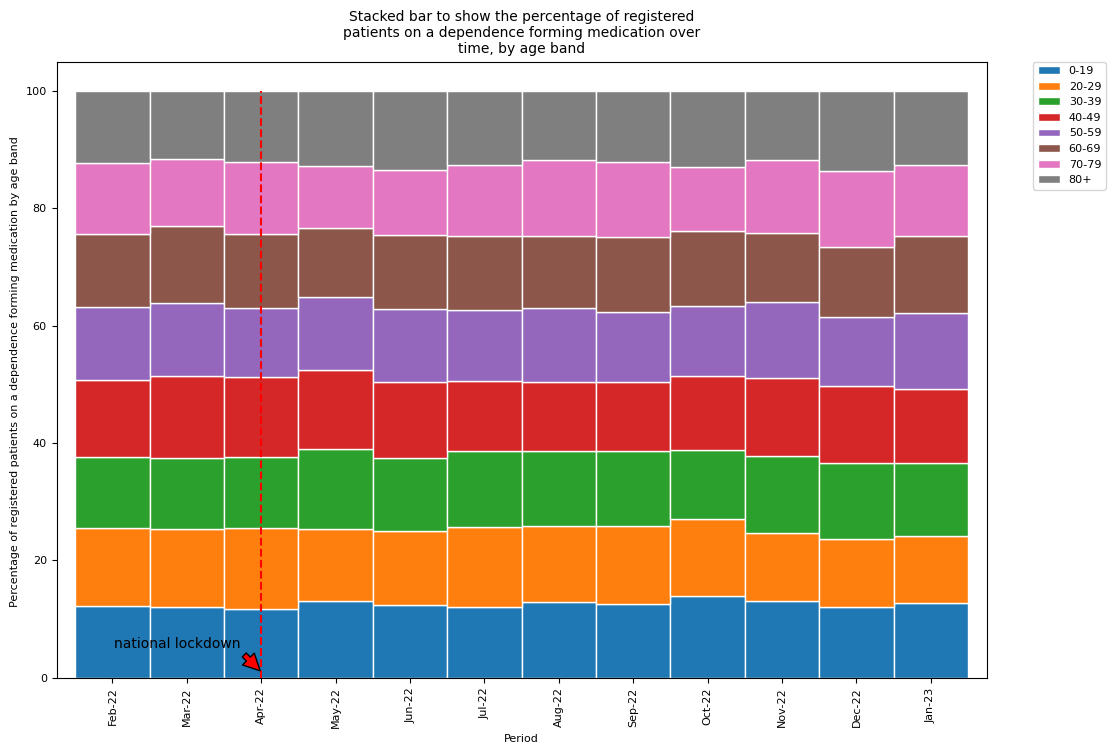

In [126]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
totam = df_age_stacked.sum(axis=1)
peram = df_age_stacked.div(totam, axis=0).mul(100).round(2)
ax = peram.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [127]:
print(tabulate(peram.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peram.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.24    13.29    12.09    13.09    12.49    12.44    12.19  12.19
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23    12.8    11.44    12.34     12.7     12.9    13.15    12.14  12.54


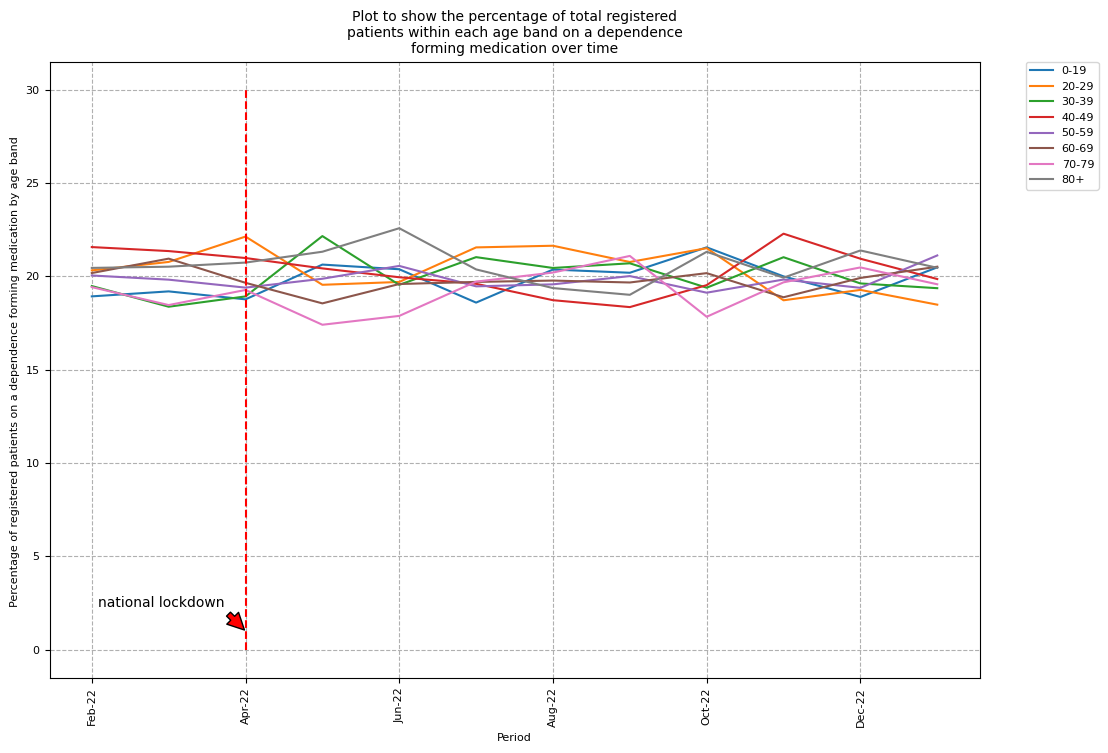

In [128]:
data_measure_dfm_medications_age_rate['value'] = 100 * data_measure_dfm_medications_age_rate['value']
df_measure_age_population_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='value')
df_measure_age_population_rate.index = pd.to_datetime(df_measure_age_population_rate.index).strftime('%b-%y')
ax = df_measure_age_population_rate.plot(fontsize=8, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=20,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the percentage of total registered patients within each age band on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_age_population_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [129]:
print(tabulate(df_measure_age_population_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_age_population_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  18.9294  20.3221  19.4826  21.5702  20.0483   20.179  19.4245  20.4545
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Jan-23  20.4839  18.4853  19.3676  19.8582  21.1221  20.5189  19.5776  20.4601


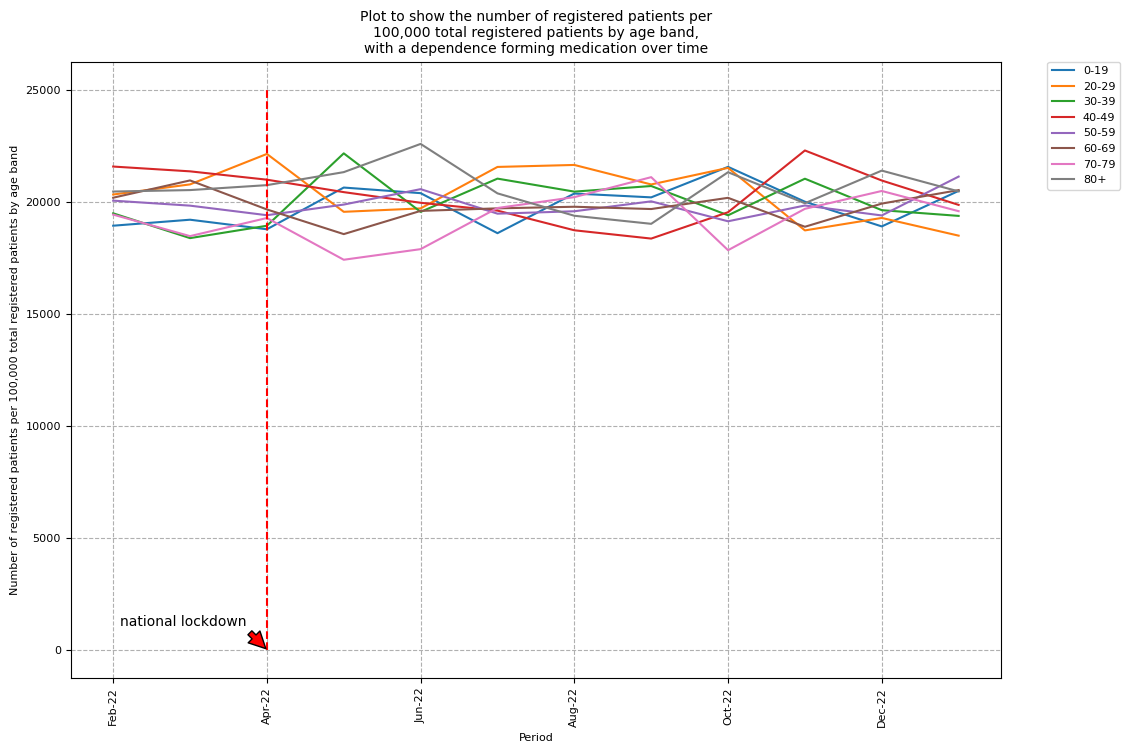

In [130]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [131]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  18929.4  20322.1  19482.6  21570.2  20048.3    20179  19424.5  20454.5
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Jan-23  20483.9  18485.3  19367.6  19858.2  21122.1  20518.9  19577.6  20460.1


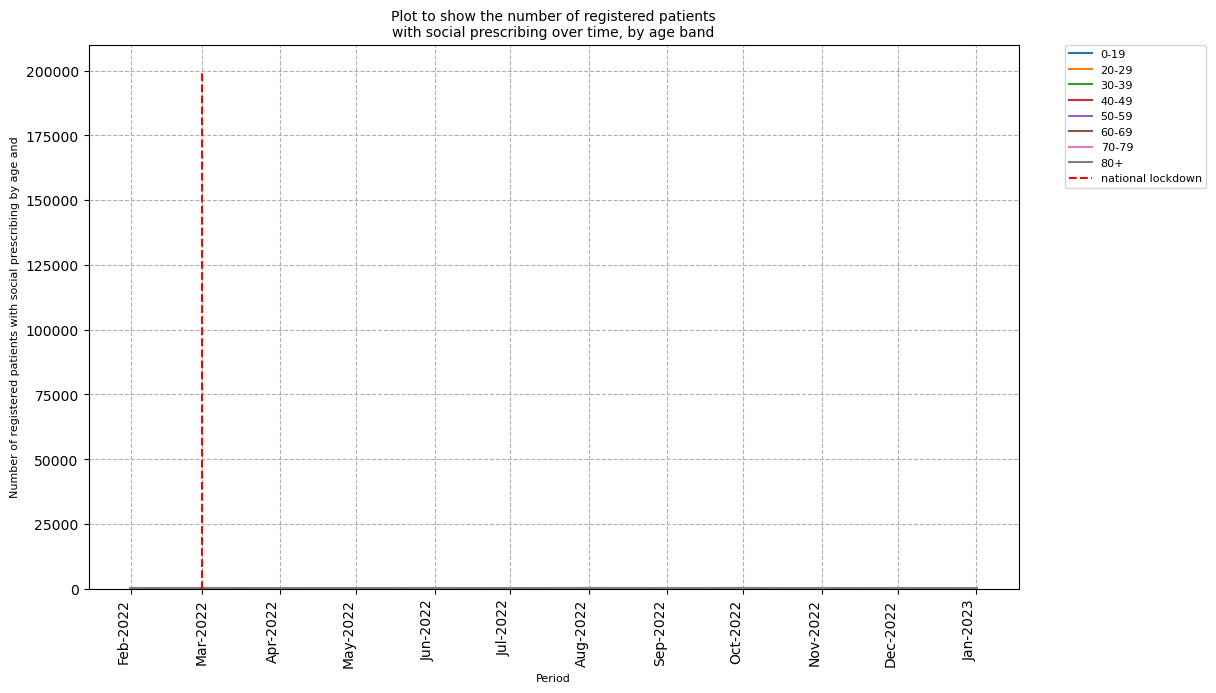

In [132]:
data_measure_social_prescribing_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_social_prescribing_age_rate)
df2 = df.groupby(['date', 'age_band']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by age and', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=1000000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [133]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     251      269      273      229      260      228      235    249
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     238      235      247      265      248      258      235    257


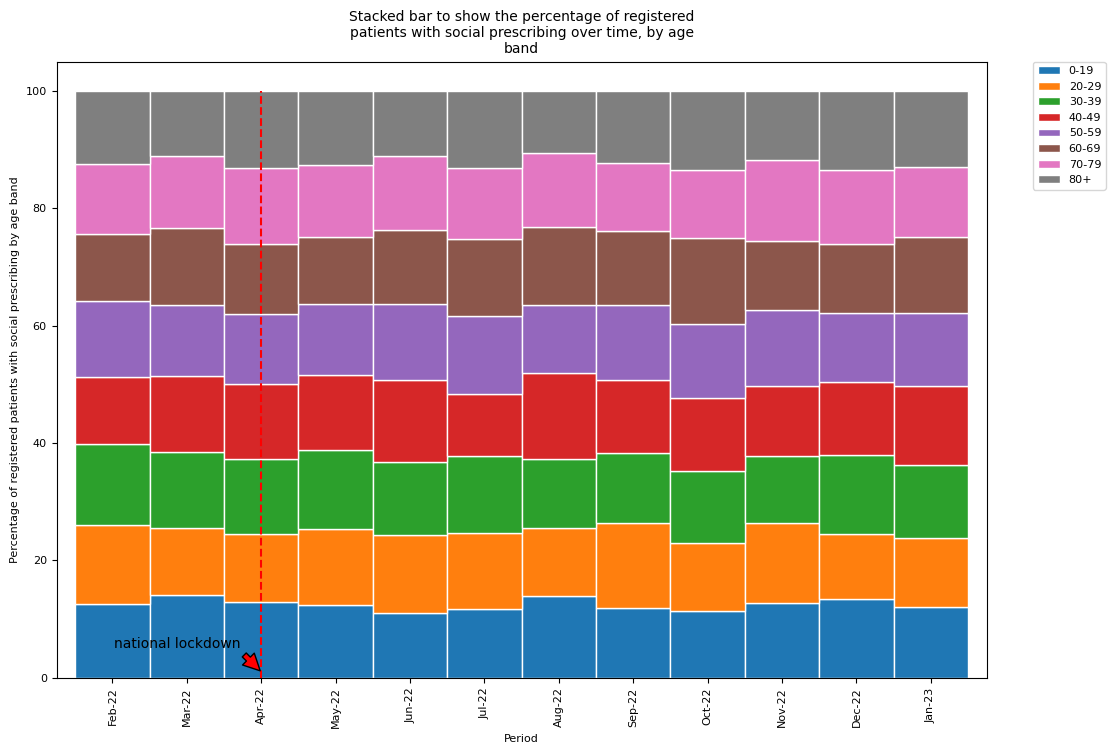

In [134]:
df_age_social_stacked = pd.DataFrame(df2)
df_age_social_stacked.head()
df_age_social_stacked.index = pd.to_datetime(df_age_social_stacked.index).strftime('%b-%y')
totas = df_age_social_stacked.sum(axis=1)
peras = df_age_social_stacked.div(totas, axis=0).mul(100).round(2)
ax = peras.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [135]:
print(tabulate(peras.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peras.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.59    13.49    13.69    11.48    13.04    11.43    11.79  12.49
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23      12    11.85    12.46    13.36    12.51    13.01    11.85  12.96


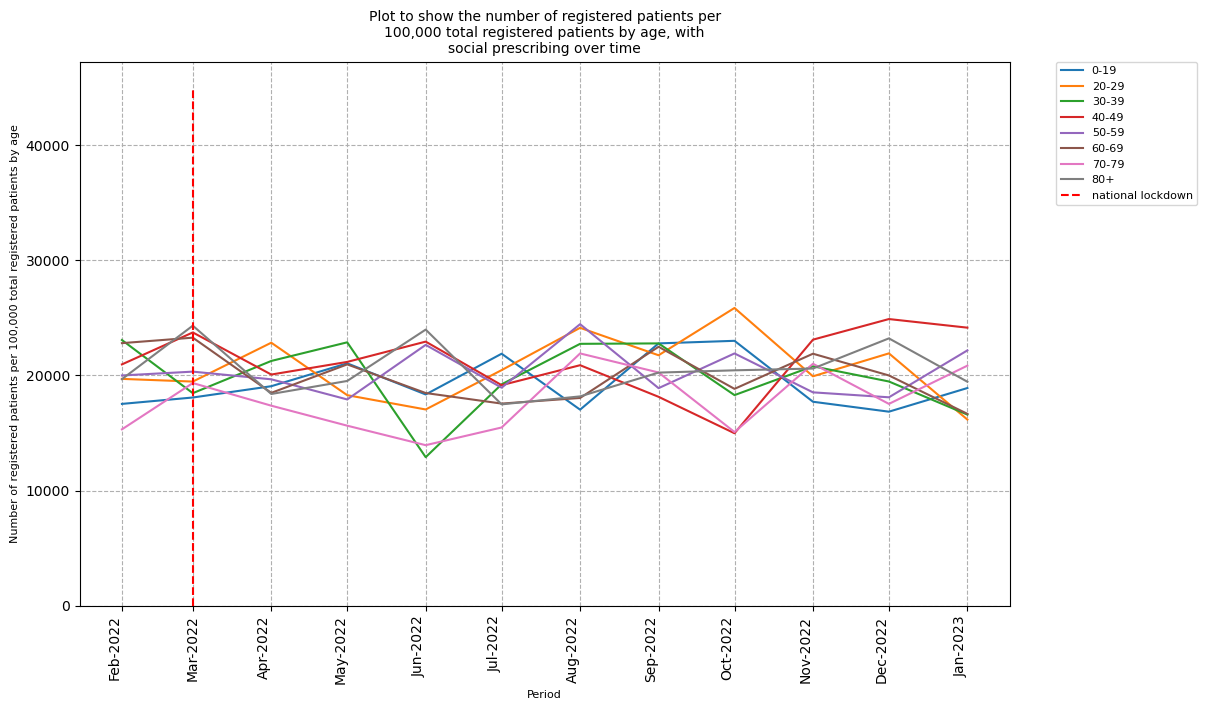

In [136]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [137]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  17529.9  19702.6  23076.9  20960.7    20000    22807  15319.1  19678.7
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  18907.6  16170.2  16599.2  24150.9  22177.4  16666.7  20851.1  19455.3


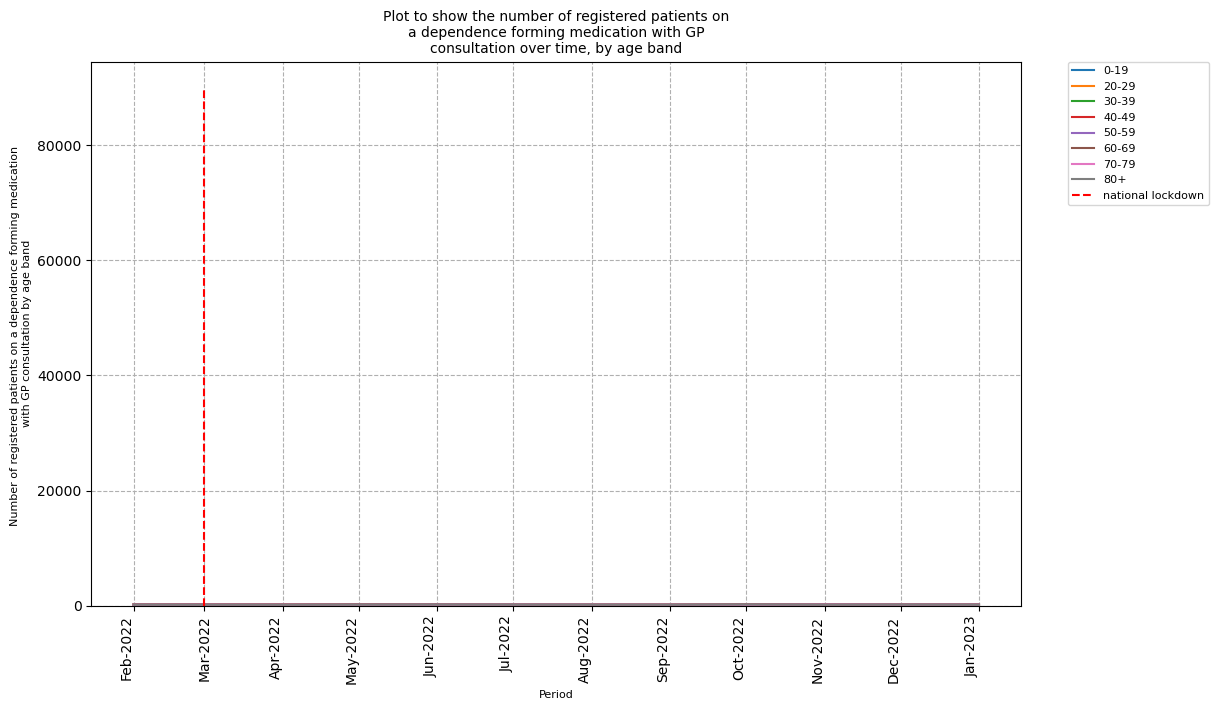

In [138]:
data_measure_consultation_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["with_consultation"] == 1, :]
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_consultation_age_rate)
df2 = df.groupby(['date', 'age_band']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=90000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [139]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     183      208      183      190      189      207      174    180
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     185      160      193      195      190      198      181    178


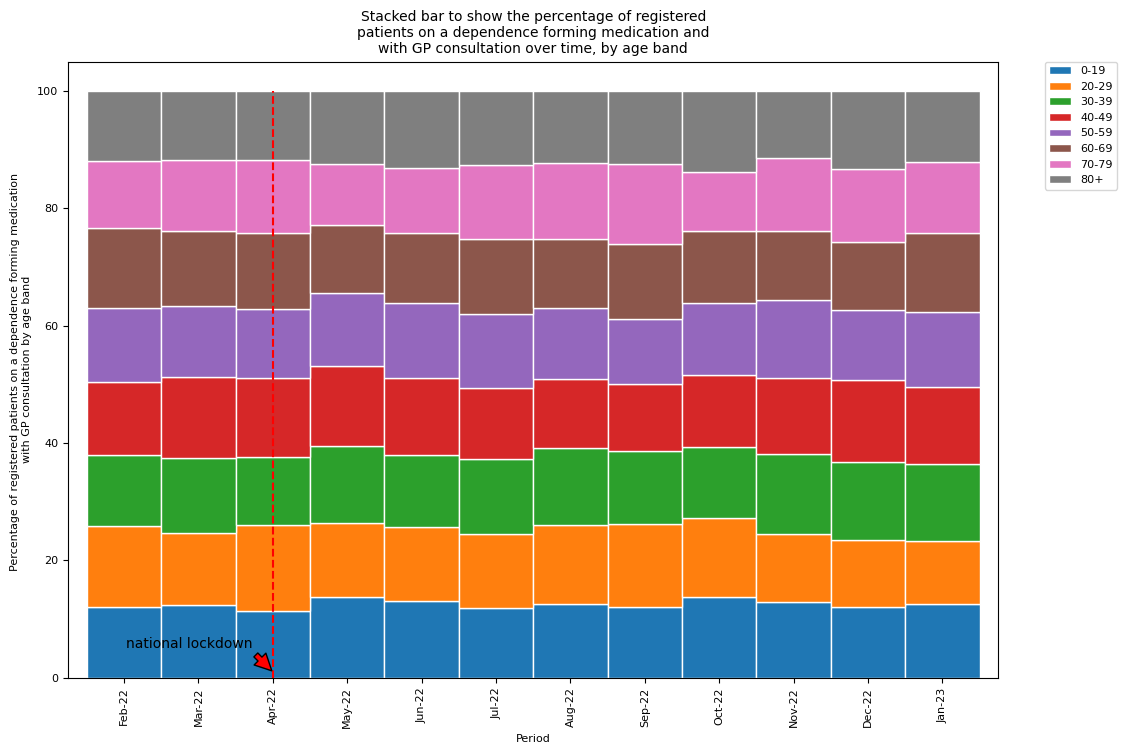

In [140]:
df_age_consult_stacked = pd.DataFrame(df2)
df_age_consult_stacked.head()
df_age_consult_stacked.index = pd.to_datetime(df_age_consult_stacked.index).strftime('%b-%y')
totac = df_age_consult_stacked.sum(axis=1)
perac = df_age_consult_stacked.div(totac, axis=0).mul(100).round(2)
ax = perac.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [141]:
print(tabulate(perac.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perac.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.09    13.74    12.09    12.55    12.48    13.67    11.49  11.89
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23    12.5    10.81    13.04    13.18    12.84    13.38    12.23  12.03


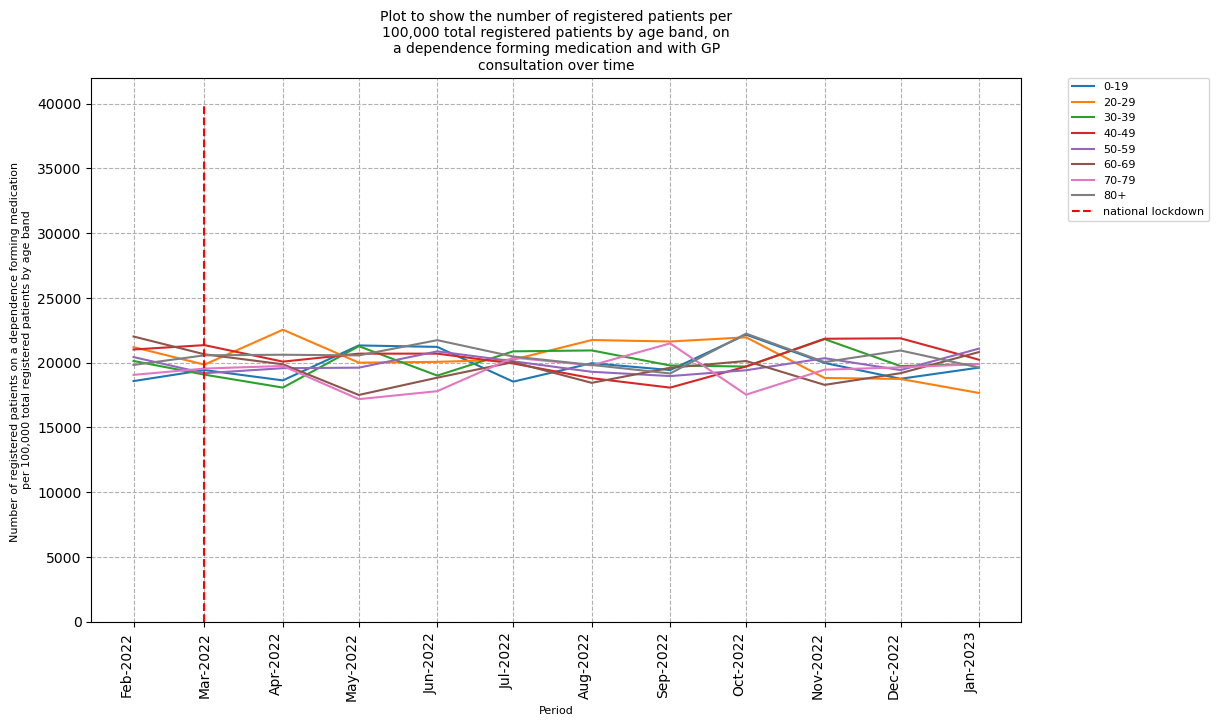

In [142]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=40000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [143]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  18578.7  21202.9    20132  21017.7  20432.4  22021.3  19058.1  19823.8
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  19618.2    17660  19896.9  20228.2  21087.7  20820.2  19890.1  19625.1
